In [ ]:
from math import isnan
from click import secho, echo, style
from pandas import concat, to_numeric
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series,DataFrame
from sklearn.datasets import load_digits
from sklearn import datasets, svm, metrics
import os
import re

In [ ]:

#https://github.com/diegomartiperez/Sparrow-data/blob/b024ee56a59bbece9086442c52f639e85e5561b9/2021-03%20(Mar%208-)%20processed%20with%20EC%20format.xlsx
#train = pd.read_excel('/content/2021-03 (Mar 8-) processed with EC format.xlsx')
#print(train.head(10))
#train = train.drop([11],axis=1)
#url = 'https://github.com/diegomartiperez/Sparrow-data/blob/main/2021-03%20(Mar%208-)%20processed%20with%20EC%20format.xlsx'
#train = pd.read_excel(url)
#train = pd.read_excel('https://github.com/diegomartiperez/Sparrow-data/blob/main/2021-03%20(Mar%208-)%20processed%20with%20EC%20format.xlsx')

#print(train,axis=1)
#print(train.iloc[:, 45])
#print(train.iloc[0:5])
#print(train.columns.values,axis=1)
#train = train.drop.columns.values

#train= train.dropna()
#print(train.shape)
#train.replace(" ", np.nan, inplace=True)
#train= train.dropna()
#print(train.loc[178,:])


#print(train.loc[176,:].value_counts())
#print(train.shape)
#print(train["Additional analytical metadata"])
#print(train.info())
#print(train.isnull())
#print(train.head(1))
#train.dropna(subset=["Unnamed: 3"], inplace=True)
#print(train["Unnamed: 3"].shape)

#print(train.describe())
#print(train.describe())

In [ ]:
import pandas as pd

github_raw_url = "https://github.com/diegomartiperez/Sparrow-data/raw/main/2021-03%20(Mar%208-)%20processed%20with%20EC%20format.xlsx"

In [ ]:
df = pd.read_excel(github_raw_url)

In [ ]:
#Delete all the rows that are fully empty
df.dropna(axis=0, how="all", inplace=True)

#Change column names to first row
df.columns = df.loc[0,:]

#Drop rows
df = df.drop(df.index[[0, 1, 2,]])


#Delete all the columns we ignore because they are empty
df.drop(df.columns[[0,11,16,62,39,40,41,42,43,44,45,63,64]], axis=1, inplace=True)

# We can do the same thing as above using dropna but on columns
df.dropna(axis=1, how="all", inplace=True)



In [ ]:
df


,SAMPLE ID,ANALYZED MATERIAL,ANALYZED AS REFERENCE MATERIAL? Y/N,Sample Description,Sample Mount Name,Data Point Notes,Grain Number,Population Number,Source Volcano or Vent,Tephra Name,GVP Volcano Number,Analyst,ANALYSIS DATE\n and TIME,ANALYTICAL SESSION ID,Beam Diameter,NUMBER OF ANALYSES,DATA LINE TYPE,SiO2 norm,TiO2 norm,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,BaO,ORIGINAL TOTAL,Na-TDI%,K-TDI%,SiO2 adj unnorm,TiO2 adj unnorm,Al2O3 adj unnorm,FeO adj unnorm,MnO adj unnorm,MgO adj unnorm,CaO adj unnorm,Na2O adj unnorm,K2O adj unnorm,P2O5 adj unnorm,Cl adj unnorm,BaO adj unnorm,ORIGINAL TOTAL,H2Od,SiO2 blank only,TiO2 blank only,Al2O3 blank only,FeO blank only,MnO blank only,MgO blank only,CaO blank only,Na2O blank only,K2O blank only,P2O5 blank only,Cl blank only,BaO blank only,ORIGINAL TOTAL,X-POS,Y-POS,Z-POS
5,CU2025,glass,N,38-250 micron sieve fraction,LR,NaN,3,1,Nisyros,NaN,212050,"Appiah, S.",2021-03-09 18:00:24.192000,2021-03-02-B,5,NaN,single,65.4204,0.578487,16.4035,3.88526,0.176781,1.25411,3.65401,5.6733,2.45125,0.249235,0.0759475,95.7883,51.2039,-0.19397,62.6651,0.554123,15.7126,3.72163,0.169336,1.20129,3.50011,5.43436,2.34801,0.238738,0.219866,0.0727488,95.7883,4.21169,63.1765,0.555063,15.6028,3.65815,0.169858,1.18958,3.53403,5.54107,2.29322,0.284194,0.188494,0.0575316,96.208,55.433,10.1033,2.63718
6,CU2025,glass,N,38-250 micron sieve fraction,LR,NaN,4,1,Nisyros,NaN,212050,"Appiah, S.",2021-03-09 18:03:48.960000,2021-03-02-B,5,NaN,single,65.4647,0.581764,16.5783,3.59407,0.147234,1.27142,3.40165,5.78163,2.71573,0.212724,0.0714342,94.2711,50.5252,15.3005,61.7143,0.548436,15.6285,3.38817,0.138799,1.19859,3.20677,5.45041,2.56015,0.200537,0.218404,0.0673418,94.2711,5.72889,62.2179,0.549366,15.5193,3.33038,0.139227,1.1869,3.23785,5.55744,2.50041,0.23872,0.18724,0.0532556,94.6757,55.5993,10.0148,2.63712
7,CU2025,glass,N,38-250 micron sieve fraction,LR,NaN,13,1,Nisyros,NaN,212050,"Appiah, S.",2021-03-09 18:36:25.920000,2021-03-02-B,5,NaN,single,65.2008,0.610858,16.4238,4.19984,0.128498,1.32486,3.87292,5.53129,2.202,0.248101,0.106959,97.2376,22.7383,-6.11,63.3997,0.593983,15.9701,4.08383,0.124949,1.28826,3.76593,5.37849,2.14117,0.241248,0.188429,0.104005,97.2376,2.7624,63.9171,0.594991,15.8585,4.01417,0.125334,1.2757,3.80243,5.48411,2.09121,0.287182,0.161542,0.0822496,97.6581,54.4315,9.2635,2.64699
8,CU2025,glass,N,38-250 micron sieve fraction,LR,NaN,14,1,Nisyros,NaN,212050,"Appiah, S.",2021-03-09 18:39:53.280000,2021-03-02-B,5,NaN,single,65.825,0.565717,16.646,3.73304,0.0787857,1.22105,3.33523,5.75062,2.35462,0.217323,0.0746911,95.7032,51.6644,-0.73662,62.9966,0.541409,15.9307,3.57264,0.0754005,1.16858,3.19193,5.50353,2.25344,0.207985,0.244722,0.0714818,95.7032,4.29677,63.5107,0.542328,15.8194,3.5117,0.0756331,1.15719,3.22286,5.6116,2.20086,0.247586,0.209803,0.0565296,96.1189,55.599,9.66525,2.64702
9,CU2025,glass,N,38-250 micron sieve fraction,LR,NaN,15,1,Nisyros,NaN,212050,"Appiah, S.",2021-03-09 18:43:20.640000,2021-03-02-B,5,NaN,single,66.6087,0.617651,15.9168,3.9839,0.132864,1.16287,3.31968,5.05931,2.72647,0.237938,0.0662752,93.9871,45.7756,0.176383,62.6036,0.580512,14.9597,3.74436,0.124875,1.09295,3.12007,4.75509,2.56253,0.223631,0.203298,0.0622901,93.9871,6.01292,63.1145,0.581497,14.8552,3.68049,0.12526,1.08229,3.15031,4.84847,2.50273,0.266211,0.17429,0.0492606,94.3912,54.258,8.7725,2.64702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,Orthoclase Glass USGS-Corning,glass,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000-0002-2918-980X,2021-03-12 00:00:00,2021-03-02-E,variable 8 and 6,12,Mean,65.8124,0.00110536,18.0276,0.024132,-0.0122514,0.000490032,-0.0029566,0.0096257,16.1444,0.00439869,-0.00849322,98.1083,NaN,5.08318,64.5673,0.00109148,17.6865,0.0237144,-0.0120214,0.000481837,-0.00288951,0.00945418,15.8391,0.00431018,-0.0005

It looks like the first row should be the column titles. Perhaps get rid of rows where "SAMPLE ID" is null. And then there will probably be some duplicates to remove as well.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 5 to 1050
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   SAMPLE ID                            676 non-null    object
 1   ANALYZED MATERIAL                    550 non-null    object
 2   ANALYZED AS REFERENCE MATERIAL? Y/N  676 non-null    object
 3   Sample Description                   424 non-null    object
 4   Sample Mount Name                    425 non-null    object
 5   Data Point Notes                     138 non-null    object
 6   Grain Number                         386 non-null    object
 7   Population Number                    158 non-null    object
 8   Source Volcano or Vent               226 non-null    object
 9   Tephra Name                          109 non-null    object
 10  GVP Volcano Number                   226 non-null    object
 11  Analyst                              670 non

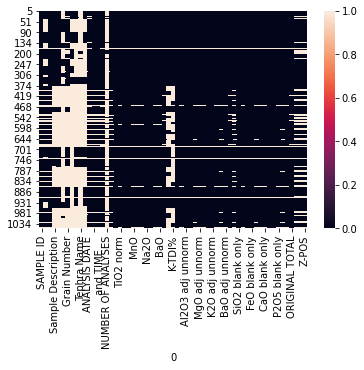

In [ ]:
sns.heatmap(df.isnull()) ## Checkout some of these columns with a few non-null values
## see what can be dropped and not. 